# CAR PRICE PREDICTION WITH MACHINE LEARNING

DATA DESCRIPTION:

We have 9 fields as our features of our car. We want to predict the selling price of our car when given the other features of the car.

The colummn "Car_name" is a pure cateogorical field which will not have any effect on the price, so we are not going to consider while predicting the price of the car

In [40]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Loading the dataset

car_sales=pd.read_csv('car data.csv')
car_sales

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Data Analysis & Cleaning

In [42]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [43]:
car_sales.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [44]:
car_sales.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


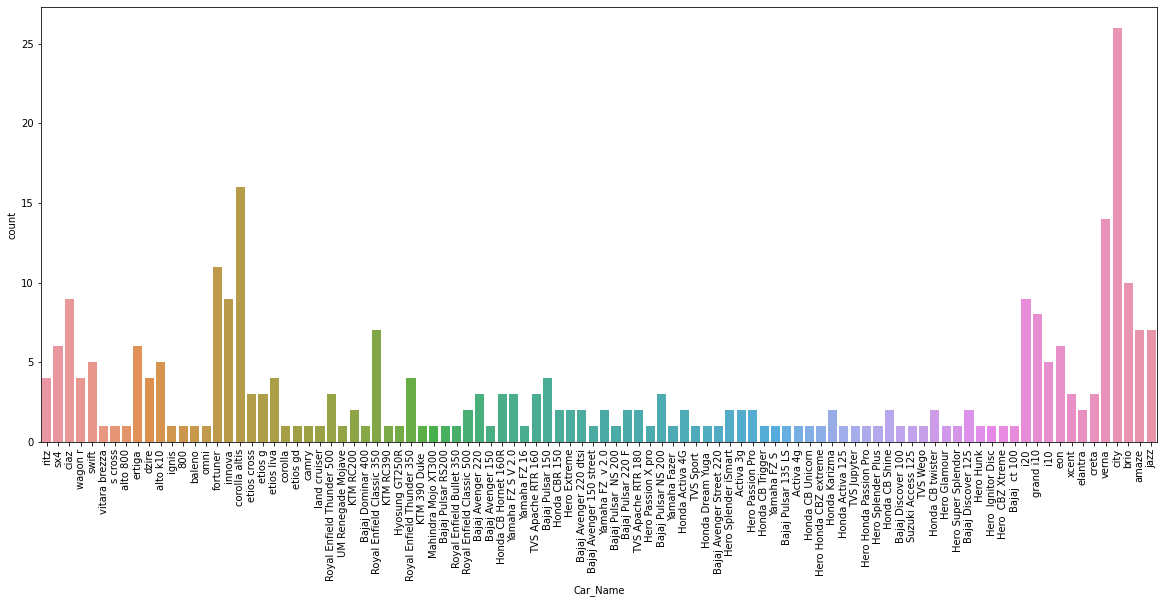

In [45]:
plt.figure(figsize=(20,8))
sns.countplot(x=car_sales['Car_Name'])
plt.xticks(rotation=90)
plt.show()

## Observations:

- We can see that Honda city is most sold model followed by corolla altis then verna.

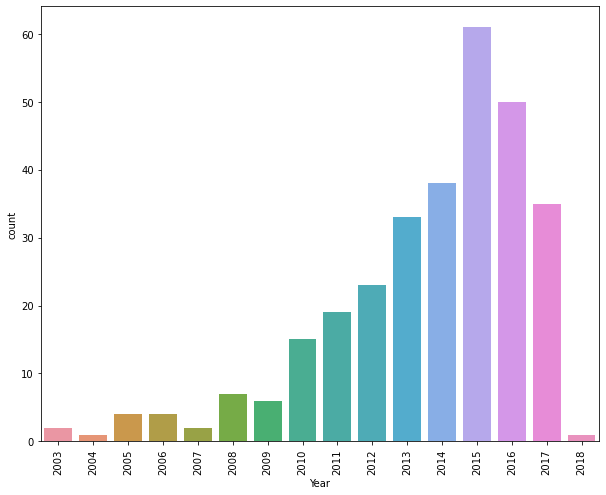

In [46]:
plt.figure(figsize=(10,8))
sns.countplot(x=car_sales['Year'])
plt.xticks(rotation=90)
plt.show()

# Observation:

- 2017 seems to be the year which witnessed massive sales followed by 2016,1014 . 2018,2004 seem to have witnessed low sales .

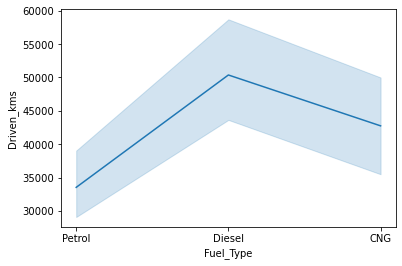

In [47]:
sns.lineplot(data=car_sales,x='Fuel_Type',y='Driven_kms')
plt.show()

## Observations:

- It is clear that a desiel engine has more milegae than cng and petrol

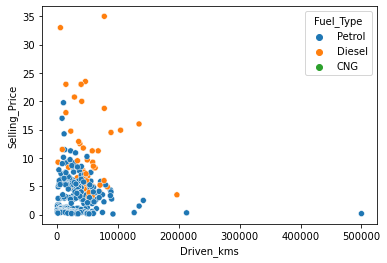

In [48]:
sns.scatterplot(data=car_sales,x='Driven_kms',y='Selling_Price',hue='Fuel_Type')
plt.show()

In [49]:
car_sales[car_sales['Fuel_Type']=='CNG']

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
18,wagon r,2015,3.25,5.09,35500,CNG,Dealer,Manual,0
35,sx4,2011,2.95,7.74,49998,CNG,Dealer,Manual,0


# Observations:

- Depreciation Over Distance: The selling price of vehicles generally decreases as the distance driven increases, indicating typical value depreciation with usage.

- Fuel Type Impact: Diesel vehicles often command higher resale prices than petrol ones across various mileages, suggesting they may retain value better or are in higher demand in the used car market.

- CNG Vehicles Rarity: CNG vehicles are less common and show lower mileage, which could imply newer market entry or selective usage.

- Market Limits: There is an apparent price cap in the used vehicle market, as high prices are not typically reached, even for low-mileage vehicles.

### DATA PREPARATION

In [50]:
numerical_columns=car_sales.select_dtypes(['int64','float64'])
numerical_columns

,Year,Selling_Price,Present_Price,Driven_kms,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


In [51]:
numerical_columns.drop(['Selling_Price'],axis=1,inplace=True)

PERFORMING STANDARDIZATION

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()
# Standardize the columns
numerical_columns_standardized = scaler.fit_transform(numerical_columns)

# Put the standardized data back into a DataFrame (if needed), retaining column names
numerical_columns_standardized_df = pd.DataFrame(numerical_columns_standardized, columns=numerical_columns.columns)

In [54]:
numerical_columns_standardized_df

,Year,Present_Price,Driven_kms,Owner
0,0.128897,-0.236256,-0.256224,-0.174501
1,-0.217514,0.221544,0.155911,-0.174501
2,1.168129,0.257472,-0.773969,-0.174501
3,-0.910335,-0.403151,-0.817758,-0.174501
4,0.128897,-0.087906,0.141743,-0.174501
...,...,...,...,...
296,0.821718,0.460295,-0.076225,-0.174501
297,0.475308,-0.200328,0.593804,-0.174501
298,-1.603156,0.390756,1.313340,-0.174501
299,1.168129,0.564604,-0.719876,-0.174501


In [55]:
categorical_columns=car_sales.select_dtypes(['object'])
categorical_columns

,Car_Name,Fuel_Type,Selling_type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


In [56]:
categorical_columns.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [57]:
categorical_columns.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
categorical_columns.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [58]:
categorical_columns

,Car_Name,Fuel_Type,Selling_type,Transmission
0,ritz,0,0,0
1,sx4,1,0,0
2,ciaz,0,0,0
3,wagon r,0,0,0
4,swift,1,0,0
...,...,...,...,...
296,city,1,0,0
297,brio,0,0,0
298,city,0,0,0
299,city,1,0,0


In [59]:
# Horizontal concatenation
combined_df_horizontal = pd.concat([numerical_columns_standardized_df,categorical_columns ], axis=1)

In [60]:
price=car_sales['Selling_Price']

In [61]:
combined_df_horizontal['Selling_Price'] = price

In [62]:
X = combined_df_horizontal.drop(['Car_Name','Selling_Price'],axis=1)
Y = combined_df_horizontal['Selling_Price']

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn import metrics

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

### Training the Linear Regression model

In [65]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [66]:
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [67]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [68]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8757287527605652


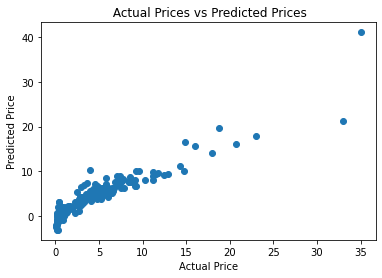

In [69]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [70]:
# prediction on Testing data
test_data_prediction = lin_reg_model.predict(X_test)


In [71]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.877244354016641


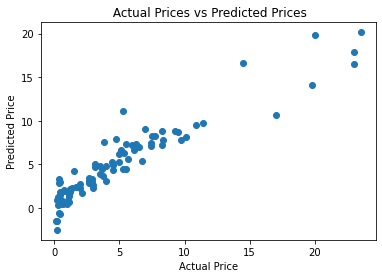

In [72]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## IMP OBSERVATION:

If you see the error scores and scatter plots in both training and testing prediction cases, we got almost same results proving that our model is efficient in predicting the prices.

## Training the Ridge Regression model

In [73]:
# loading the ridge regression model
rigd_reg_model = Ridge()

In [74]:
rigd_reg_model.fit(X_train,y_train)

Ridge()

In [75]:
# prediction on Training data
training_data_prediction = rigd_reg_model.predict(X_train)

In [76]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8756975470923455


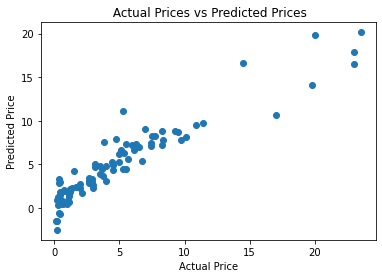

In [77]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## Observations:

- We can see that there is no much improvement in the model and hence we can stick with the linear model itself

#### GIVING THE INPUT FEATURE VALUES AND PREDICTING THE SELLING PRICE OF THE CAR

In [78]:
features = np.array([[-0.910335, -0.236256, -0.256224,-0.174501,0, 0, 1 ]])
prediction = lin_reg_model.predict(features)
print("Prediction: {}".format(prediction))                      

Prediction: [4.27425363]


/Users/jithu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
